# List of libraries



* !pip install torch
* !pip install transformers
* !pip install sentencepiece
* !pip install quanto
* !pip install accelerate
* !pip install tensorboard
* !pip install torchvision

If you want to upgrade  - !pip install --upgrade torch

If if you are getting the error "Could not install packages due to an EnvironmentError: Access is denied"" - !pip install torch --user


# Integers

In [4]:
import torch

In [5]:
torch.iinfo(torch.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [6]:
torch.iinfo(torch.int8)

iinfo(min=-128, max=127, dtype=int8)

In [7]:
torch.iinfo(torch.int16)

iinfo(min=-32768, max=32767, dtype=int16)

# Floating Point

In [8]:
torch.finfo(torch.float32)

finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)

In [9]:
torch.finfo(torch.float16)

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)

In [10]:
torch.finfo(torch.bfloat16)

finfo(resolution=0.01, min=-3.38953e+38, max=3.38953e+38, eps=0.0078125, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=bfloat16)

In [11]:
x = 10/3

In [12]:
format(x, '.60f')

'3.333333333333333481363069950020872056484222412109375000000000'

In [13]:
tensor_fp64 = torch.tensor(x, dtype = torch.float64)
tensor_fp32 = torch.tensor(x, dtype = torch.float32)
tensor_fp16 = torch.tensor(x, dtype = torch.float16)
tensor_bf16 = torch.tensor(x, dtype = torch.bfloat16)

In [14]:
print(f"fp64 tensor: {format(tensor_fp64.item(), '.60f')}")
print(f"fp32 tensor: {format(tensor_fp32.item(), '.60f')}")
print(f"fp16 tensor: {format(tensor_fp16.item(), '.60f')}")
print(f"bf16 tensor: {format(tensor_bf16.item(), '.60f')}")

fp64 tensor: 3.333333333333333481363069950020872056484222412109375000000000
fp32 tensor: 3.333333253860473632812500000000000000000000000000000000000000
fp16 tensor: 3.333984375000000000000000000000000000000000000000000000000000
bf16 tensor: 3.328125000000000000000000000000000000000000000000000000000000


# Downcasting FP32 to BF16

In [ ]:
# Create a random PyTorch tensor with 1000 elements of type float32

In [18]:
tensor_fp32 = torch.rand(1000, dtype=torch.float32)

In [ ]:
# Get and print the first 5 elements of the random tensor to inspect

In [19]:
print(tensor_fp32[:5])

tensor([0.6218, 0.4792, 0.7669, 0.6732, 0.1928])


In [ ]:
# Downcast (convert) the tensor to bfloat16 using the "to" method

In [20]:
tensor_fp32_to_bf16 = tensor_fp32.to(dtype=torch.bfloat16)

In [ ]:
# Get and print the first 5 elements of the downcasted tensor to compare with float32

In [21]:
print(tensor_fp32_to_bf16[:5])

tensor([0.6211, 0.4785, 0.7656, 0.6719, 0.1924], dtype=torch.bfloat16)


In [ ]:
# Perform dot product of the original float32 tensor with itself

In [22]:
m_float32 = torch.dot(tensor_fp32, tensor_fp32)

In [ ]:
# Print the result of the float32 dot product

In [23]:
print("Dot product result with float32:", m_float32)

Dot product result with float32: tensor(329.0930)


In [ ]:
# Perform dot product of the bfloat16 tensor with itself

In [24]:
m_bfloat16 = torch.dot(tensor_fp32_to_bf16, tensor_fp32_to_bf16)

In [ ]:
# Print the result of the bfloat16 dot product

In [25]:
print("Dot product result with bfloat16:", m_bfloat16)

Dot product result with bfloat16: tensor(330., dtype=torch.bfloat16)


 # Fashion MNIST model

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
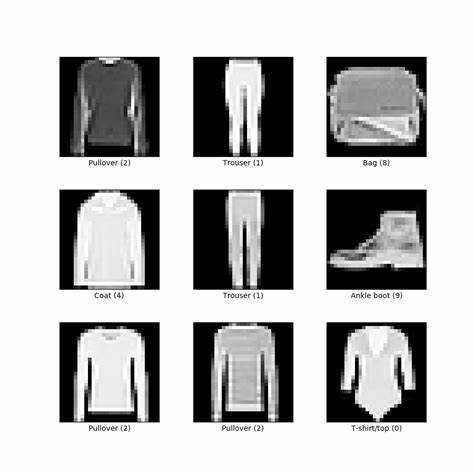

In [26]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

# Define transformation to normalize the data: convert images to tensors and normalize them to a range of -1 to 1
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if not available
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets
# Shuffle the training data to ensure randomness; validation data does not need shuffling
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Define class labels for easier interpretation of the results
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Define the model architecture for garment classification
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        # Convolutional layer: input channel 1 (grayscale), output 6, kernel size 5x5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # Max pooling layer: kernel size 2x2, stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer: input 6, output 16, kernel size 5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layer: input size 16*4*4, output size 120
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        # Fully connected layer: output size 84
        self.fc2 = nn.Linear(120, 84)
        # Final fully connected layer: output size 10 (for 10 classes)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply first convolutional layer, ReLU activation, and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer, ReLU activation, and pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor for fully connected layers
        x = x.view(-1, 16 * 4 * 4)
        # Apply fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Apply the final layer to get logits for 10 classes
        x = self.fc3(x)
        return x

# Instantiate the model
model = GarmentClassifier()

# Define loss function (cross-entropy for multi-class classification)
loss_fn = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Function to train the model for one epoch
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.0
    last_loss = 0.0

    # Enumerate over the training data
    for i, data in enumerate(training_loader):
        # Inputs and labels from the current batch
        inputs, labels = data

        # Zero out gradients to prevent accumulation
        optimizer.zero_grad()

        # Forward pass: make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and backpropagate
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Update the model weights
        optimizer.step()

        # Update running loss and log every 1000 batches
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000  # Average loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.0

    return last_loss

# Set up TensorBoard to visualize training metrics
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

# Number of epochs to train the model
EPOCHS = 5

# Initialize the best validation loss with a high value
best_vloss = 1_000_000.0

# Training loop
for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Set the model to training mode to track gradients
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    running_vloss = 0.0

    # Set the model to evaluation mode (disable dropout and batchnorm updates)
    model.eval()

    # Disable gradient computation for validation (saves memory and computation)
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            # Forward pass for validation data
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss.item()

    # Calculate average validation loss
    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log training vs. validation loss to TensorBoard
    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()

    # Save the model if the current validation loss is the best so far
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    # Increment the epoch counter
    epoch_number += 1


100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:05<00:00, 4757784.39it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 61968.92it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:01<00:00, 2865046.42it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 1287400.25it/s]


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

EPOCH 1:
  batch 1000 loss: 1.823573484107852
  batch 2000 loss: 0.8457309862598776
  batch 3000 loss: 0.7207988163419068
  batch 4000 loss: 0.6647752400673926
  batch 5000 loss: 0.5931583128785715
  batch 6000 loss: 0.5625963939100038
  batch 7000 loss: 0.534437843982596
  batch 8000 loss: 0.48988430011924355
  batch 9000 loss: 0.5281626285195816
  batch 10000 loss: 0.47291349931352306
  batch 11000 loss: 0.48552417491469535
  batch 12000 loss: 0.4556596021070145
  batch 13000 loss: 0.4397425925032585
  batch 14000 loss: 0.44713757166848517
  batch 15000 loss: 0.45948156065831425
LOSS train 0.45948156065831425 valid 0.42798632961977273
EPOCH 2:
  batch 1000 loss: 0.44064244329195934
  batch 2000 loss: 0.40825023662135934
  batch 3000 loss: 0.4051016700906912
  batch 4000 loss: 0.3992000386795553
  batch 5000 loss: 0.392470339659747
  batch 6000 loss: 0.3835932804834447
  batch 7000 loss: 0.3950884

In [27]:
def print_param_dtype(model):
    # Iterate through all named parameters in the model
    for name, param in model.named_parameters():
        # Print the parameter name and its data type (dtype)
        print(f"{name} is loaded in {param.dtype}")

In [28]:
print_param_dtype(model)

conv1.weight is loaded in torch.float32
conv1.bias is loaded in torch.float32
conv2.weight is loaded in torch.float32
conv2.bias is loaded in torch.float32
fc1.weight is loaded in torch.float32
fc1.bias is loaded in torch.float32
fc2.weight is loaded in torch.float32
fc2.bias is loaded in torch.float32
fc3.weight is loaded in torch.float32
fc3.bias is loaded in torch.float32


In [31]:
from copy import deepcopy

In [32]:
model_bf16 = deepcopy(model)

In [33]:
model_bf16 = model_bf16.to(torch.bfloat16)

In [34]:
print_param_dtype(model_bf16)

conv1.weight is loaded in torch.bfloat16
conv1.bias is loaded in torch.bfloat16
conv2.weight is loaded in torch.bfloat16
conv2.bias is loaded in torch.bfloat16
fc1.weight is loaded in torch.bfloat16
fc1.bias is loaded in torch.bfloat16
fc2.weight is loaded in torch.bfloat16
fc2.bias is loaded in torch.bfloat16
fc3.weight is loaded in torch.bfloat16
fc3.bias is loaded in torch.bfloat16


In [35]:
def evaluate_model(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    # Initialize metrics
    correct = 0
    total = 0

    # Disable gradient calculation for inference
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # Forward pass: get predictions
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get class index with highest probability
            # Update metrics
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and return accuracy
    accuracy = 100 * correct / total
    return accuracy

In [36]:
# Load the test dataset
test_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False)

In [37]:
def evaluate_model_bf16(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    # Initialize metrics
    correct = 0
    total = 0

    # Disable gradient calculation for inference
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # Convert input images to bfloat16 to match the model
            images = images.to(torch.bfloat16)
            # Forward pass: get predictions
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get class index with highest probability
            # Update metrics
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate and return accuracy
    accuracy = 100 * correct / total
    return accuracy

In [39]:
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy of the model on the test set 32 bits: {test_accuracy:.2f}%')

Accuracy of the model on the test set 32 bits: 88.77%


In [40]:
test_accuracy = evaluate_model_bf16(model_bf16, test_loader)
print(f'Accuracy of the model on the test set BF16: {test_accuracy:.2f}%')

Accuracy of the model on the test set BF16: 88.73%


In [41]:
torch.save(model.state_dict(), "garment_class_FP32.pth")
torch.save(model_bf16.state_dict(), "garment_class_bf16.pth")

# GPT-Neo

In [57]:
from transformers import GPTNeoForCausalLM, AutoTokenizer
import torch

In [58]:
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-125M")

In [59]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125M")

In [60]:
input_text = "The future of artificial intelligence is"

In [61]:
input_ids = tokenizer(input_text, return_tensors='pt').input_ids

In [62]:
output = model.generate(input_ids, max_length=25, do_sample=True, temperature=0.7)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [63]:
print (output)

tensor([[  464,  2003,   286, 11666,  4430,   318,   407,  5023,   262,  2003,
           286,   597,  1692,   852,    11,   290,  3675,   340,   481,   307,
           262,  2003,   286,   597,  3644]])


In [64]:
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The future of artificial intelligence is not unlike the future of any human being, and beyond it will be the future of any computer


In [65]:
torch.save(model.state_dict(),"GPTnew_w_fp32")

In [51]:
print (model)

GPTNeoForCausalLM(
  (transformer): GPTNeoModel(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPTNeoBlock(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPTNeoAttention(
          (attention): GPTNeoSelfAttention(
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=False)
            (q_proj): Linear(in_features=768, out_features=768, bias=False)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPTNeoMLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (c_proj): Linear(in_fe

In [66]:
layer_weights = model.transformer.h[0].attn.attention.k_proj.weight

In [67]:
print("Weights of the k_proj layer in the first block:")
print(layer_weights)

Weights of the k_proj layer in the first block:
Parameter containing:
tensor([[-0.0457, -0.0101, -0.1670,  ...,  0.0283, -0.2715, -0.1904],
        [-0.1338, -0.2617, -0.3711,  ..., -0.3105,  0.2012, -0.1914],
        [-0.0201,  0.2949,  0.0713,  ...,  0.3594,  0.0559, -0.2344],
        ...,
        [ 0.6016, -0.0645,  0.0854,  ..., -0.3047, -0.0161,  0.0547],
        [ 0.2129,  0.4238,  0.3145,  ...,  0.2812,  0.1504, -0.2373],
        [-0.5820,  0.0381, -0.3730,  ...,  0.1250, -0.1069, -0.2168]],
       requires_grad=True)


 # Quantizing the Model

In [68]:
from quanto import quantize, freeze, qint8

In [69]:
quantize(model, weights=qint8, activations=None)

In [70]:
freeze(model)

In [71]:
layer_weights = model.transformer.h[0].attn.attention.k_proj.weight

In [72]:
print("Weights of the k_proj layer in the first block:")
print(layer_weights)

Weights of the k_proj layer in the first block:
QBytesTensor(tensor([[ -6,  -1, -21,  ...,   4, -34, -24],
        [-19, -37, -52,  ..., -43,  28, -27],
        [ -3,  45,  11,  ...,  54,   8, -35],
        ...,
        [ 67,  -7,   9,  ..., -34,  -2,   6],
        [ 23,  45,  33,  ...,  30,  16, -25],
        [-67,   4, -43,  ...,  14, -12, -25]], dtype=torch.int8), scale=tensor([[0.0079],
        [0.0072],
        [0.0066],
        [0.0106],
        [0.0077],
        [0.0089],
        [0.0081],
        [0.0071],
        [0.0084],
        [0.0061],
        [0.0079],
        [0.0081],
        [0.0082],
        [0.0078],
        [0.0066],
        [0.0094],
        [0.0078],
        [0.0044],
        [0.0078],
        [0.0079],
        [0.0094],
        [0.0083],
        [0.0070],
        [0.0078],
        [0.0066],
        [0.0080],
        [0.0084],
        [0.0102],
        [0.0081],
        [0.0089],
        [0.0097],
        [0.0077],
        [0.0078],
        [0.0090],
        [0.0

In [73]:
torch.save(model.state_dict(), "GPTnew_w_int8.pth")

In [74]:
output = model.generate(input_ids, max_length=25, do_sample=True, temperature=0.7)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
C:\Users\Pukhraj\AppData\Roaming\Python\Python38\site-packages\quanto\library\ops.py:66: UserWarning: An exception was raised while calling the optimized kernel for quanto::dqmm: Ninja is required to load C++ extensions Falling back to default implementation.
  warnings.warn(message + " Falling back to default implementation.")
C:\Users\Pukhraj\AppData\Roaming\Python\Python38\site-packages\quanto\library\ops.py:66: UserWarning: An exception was raised while calling the optimized kernel for quanto::dqmm: DLL load failed while importing quanto_cpp: The specified module could not be found. Falling back to default implementation.
  warnings.warn(message + " Falling back to default implementation.")


In [76]:
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The future of artificial intelligence is in the hands of the government, who have the power to decide what information is useful to the
